## Visualize predictions

### Try to predict and visualize one single image

In [1]:
from ultralytics import YOLO
model = YOLO('runs/pose/pose_2nd_100/weights/best.pt')

# Predict with the model
results = model.predict("Data/image/CSK6-003-004_000062.jpg")

for result in results:
    # get the coords of the bounding boxes
    bboxes = result.boxes.xyxy.numpy()
    # get the coords of the keypoints
    keypoints = result.keypoints.xy.numpy()


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/Data/image/CSK6-003-004_000062.jpg: 960x1280 2 hands, 169.0ms
Speed: 5.8ms preprocess, 169.0ms inference, 1.1ms postprocess per image at shape (1, 3, 960, 1280)


In [2]:
import cv2

def plot_box(image, bboxes, thickness):
    """ Function to plot the image with bounding box"""
    for i in range(len(bboxes)):
        bb = bboxes[i]
        xmin, ymin, xmax, ymax = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(255, 0, 0), thickness=thickness)
    return image

In [3]:
def plot_keypoints(image, keypoints, thickness):
    for i in range(len(keypoints)):
        key = keypoints[i]
        for j in range(len(key)):
            x = int(key[j][0])
            y = int(key[j][1])
            image = cv2.circle(image, (x,y), radius=0, color=(0, 0, 255), thickness=thickness)
    return image

In [4]:
def plot_line(image, skeleton, keypoints, thickness):
    start_point = (225, 0)
    for i in range(len(keypoints)):
        key = keypoints[i]

        for sk in skeleton:
            start_idx = sk[0]
            end_idx = sk[1]
            start_point = (int(key[start_idx][0]), int(key[start_idx][1]))
            # print(f"start_point is: {start_point}")
            end_point = (int(key[end_idx][0]), int(key[end_idx][1]))
            # print(f"end_point is: {end_point}")

            image = cv2.line(image, start_point, end_point, color=(128, 255, 0), thickness=thickness)
    return image

(-0.5, 639.5, 479.5, -0.5)

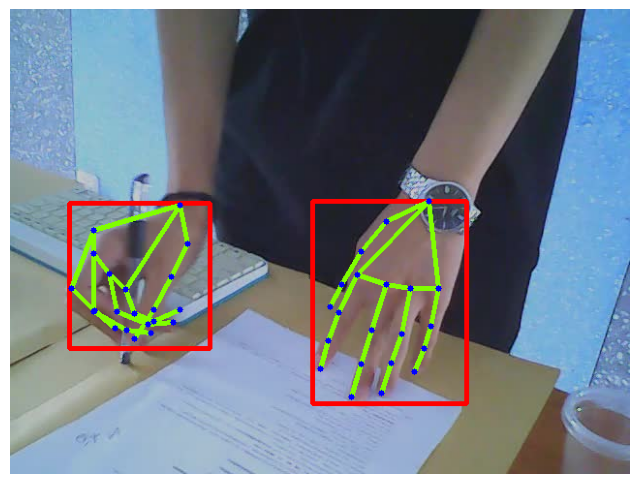

In [5]:
import matplotlib.pyplot as plt

skeleton = [[0, 1], [1, 2], [2, 3], [3, 4], [0, 5], [5, 6], [6, 7], [7, 8],
            [5, 9], [9, 10], [10, 11], [11, 12], [9, 13], [13, 14], [14, 15],
            [15, 16], [13, 17], [0, 17], [17, 18], [18, 19], [19, 20]]

plt.figure(figsize=(8, 8))
image = plt.imread("Data/image/CSK6-003-004_000062.jpg")
W = image.shape[0]
thickness = W // 120

bb_image = plot_box(image, bboxes, thickness-1)
line_image = plot_line(bb_image, skeleton, keypoints, thickness-1)
kpt_image = plot_keypoints(line_image, keypoints, thickness+2)

plt.imshow(kpt_image)
plt.axis('off')


In [6]:
import glob
import random
import os
import numpy as np

# random predict and visualize images in a 2x2 grid
def visualize(image_dir, num_samples=4):
    plt.figure(figsize=(8, 8))
    image_names = glob.glob(os.path.join(image_dir, '*.jpg'))
    random.shuffle(image_names)
    plt.figure(figsize=(8, 8))
    for i, image_name in enumerate(image_names):
        results = model.predict(image_name)
        for result in results:
            im_array = result.plot(kpt_radius=0)  # plot a BGR numpy array of predictions
            image = np.array(im_array[..., ::-1])

            # get the coords of the keypoints
            keypoints = result.keypoints.xy.numpy()

            W = image.shape[0]
            thickness = W // 120
            # plot keypoints, skeleton
            line_image = plot_line(image, skeleton, keypoints, thickness-1)
            kpt_image = plot_keypoints(line_image, keypoints, thickness+2)

        plt.subplot(2, 2, i+1)
        plt.imshow(kpt_image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/data/image/正锋RGB-003-004_000102.jpg: 736x1280 3 hands, 127.8ms
Speed: 3.9ms preprocess, 127.8ms inference, 0.8ms postprocess per image at shape (1, 3, 736, 1280)

image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/data/image/学习机CK1.0-003-004_000570.jpg: 736x1280 5 hands, 121.3ms
Speed: 5.0ms preprocess, 121.3ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/data/image/正锋RGB-003-004_000234.jpg: 736x1280 4 hands, 122.1ms
Speed: 2.6ms preprocess, 122.1ms inference, 0.7ms postprocess per image at shape (1, 3, 736, 1280)

image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/data/image/学习机CK1.0Air-003-004_000293.jpg: 736x1280 3 hands, 125.2ms
Speed: 5.0ms preprocess, 125.2ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)


<Figure size 800x800 with 0 Axes>

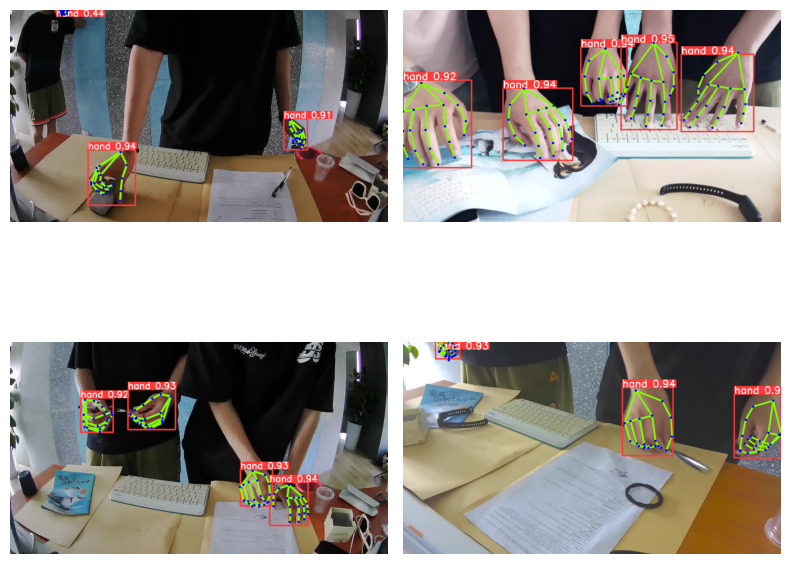

In [13]:
visualize("data/image/", num_samples=4)


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/Data/image/CSK6-003-004_000062.jpg: 960x1280 2 hands, 176.3ms
Speed: 6.5ms preprocess, 176.3ms inference, 0.8ms postprocess per image at shape (1, 3, 960, 1280)


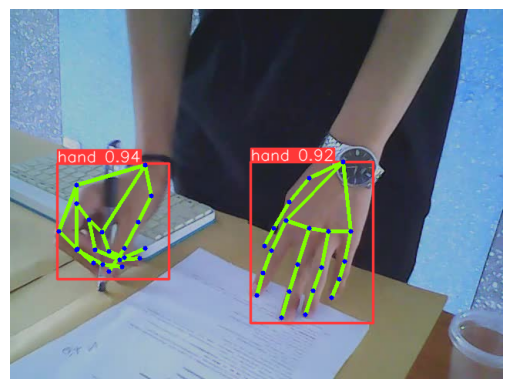

In [7]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.image as mpimg
import numpy as np

model = YOLO('runs/pose/pose_2nd_100/weights/best.pt')

# Predict with the model
results = model.predict("Data/image/CSK6-003-004_000062.jpg")

for r in results:
    im_array = r.plot(kpt_radius=0)  # plot a BGR numpy array of predictions
    image = np.array(im_array[..., ::-1])

    # get the coords of the keypoints
    keypoints = r.keypoints.xy.numpy()

    W = image.shape[0]
    thickness = W // 120
    # plot keypoints, skeleton
    line_image = plot_line(image, skeleton, keypoints, thickness-1)
    kpt_image = plot_keypoints(line_image, keypoints, thickness+2)
    # save image
    # mpimg.imsave('results.jpg', kpt_image)
    plt.imshow(kpt_image)
    plt.axis(False)


### Try to predict on custom image


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/custom_imgs/custom1.jpg: 864x1280 1 hand, 155.4ms
Speed: 6.9ms preprocess, 155.4ms inference, 0.9ms postprocess per image at shape (1, 3, 864, 1280)


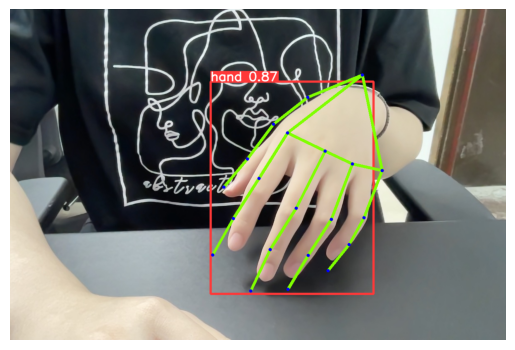

In [8]:
model = YOLO('runs/pose/pose_2nd_100/weights/best.pt')

# Predict with the model
results = model.predict("custom_imgs/custom1.jpg")

for r in results:
    im_array = r.plot(kpt_radius=0)  # plot a BGR numpy array of predictions
    image = np.array(im_array[..., ::-1])
    # get the coords of the keypoints
    keypoints = r.keypoints.xy.numpy()

    W = image.shape[0]
    thickness = W // 120
    # plot keypoints, skeleton
    line_image = plot_line(image, skeleton, keypoints, thickness-1)
    kpt_image = plot_keypoints(line_image, keypoints, thickness+2)
    # save image
    plt.imshow(kpt_image)
    plt.axis(False)


In [9]:
# Predict with the model
results = model.predict("custom_imgs/custom2.jpg")

for r in results:
    im_array = r.plot(kpt_radius=0)  # plot a BGR numpy array of predictions
    image = np.array(im_array[..., ::-1])
    # get the coords of the keypoints
    keypoints = r.keypoints.xy.numpy()

    W = image.shape[0]
    thickness = W // 120
    # plot keypoints, skeleton
    line_image = plot_line(image, skeleton, keypoints, thickness-1)
    kpt_image = plot_keypoints(line_image, keypoints, thickness+2)
    # save image
    plt.imshow(kpt_image)
    plt.axis(False)


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/custom_imgs/custom2.jpg: 864x1280 (no detections), 150.0ms
Speed: 7.7ms preprocess, 150.0ms inference, 0.5ms postprocess per image at shape (1, 3, 864, 1280)


IndexError: index 0 is out of bounds for axis 0 with size 0

### The model is poor when the fingers are *pointing upwards*, as it could not detect the hand and its keypoints...

#### `Try to add augmentation -> filp up and down with probabilities of 50%`


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/custom_imgs/custom1.jpg: 864x1280 1 hand, 154.0ms
Speed: 6.5ms preprocess, 154.0ms inference, 1.0ms postprocess per image at shape (1, 3, 864, 1280)


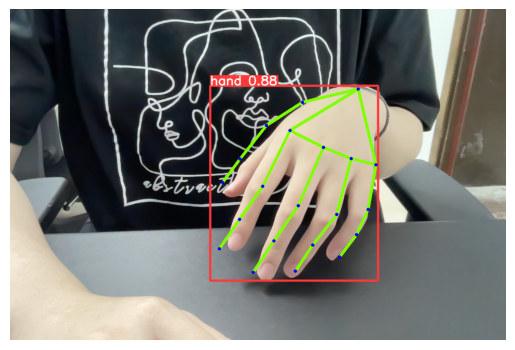

In [10]:
model = YOLO('runs/pose/pose_aug_200/weights/best.pt')

# Predict with the model
results = model.predict("custom_imgs/custom1.jpg")

for r in results:
    im_array = r.plot(kpt_radius=0)  # plot a BGR numpy array of predictions
    image = np.array(im_array[..., ::-1])
    # get the coords of the keypoints
    keypoints = r.keypoints.xy.numpy()

    W = image.shape[0]
    thickness = W // 120
    # plot keypoints, skeleton
    line_image = plot_line(image, skeleton, keypoints, thickness-1)
    kpt_image = plot_keypoints(line_image, keypoints, thickness+2)
    # save image
    plt.imshow(kpt_image)
    plt.axis(False)


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/custom_imgs/custom2.jpg: 864x1280 1 hand, 145.8ms
Speed: 8.1ms preprocess, 145.8ms inference, 0.7ms postprocess per image at shape (1, 3, 864, 1280)


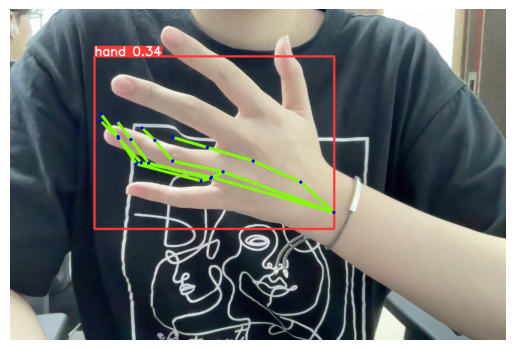

In [11]:
results = model.predict("custom_imgs/custom2.jpg")

for r in results:
    im_array = r.plot(kpt_radius=0)
    image = np.array(im_array[..., ::-1])
    keypoints = r.keypoints.xy.numpy()

    W = image.shape[0]
    thickness = W // 120
    line_image = plot_line(image, skeleton, keypoints, thickness-1)
    kpt_image = plot_keypoints(line_image, keypoints, thickness+2)
    plt.imshow(kpt_image)
    plt.axis(False)


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/custom_imgs/custom3.jpg: 864x1280 3 hands, 148.3ms
Speed: 7.7ms preprocess, 148.3ms inference, 0.7ms postprocess per image at shape (1, 3, 864, 1280)


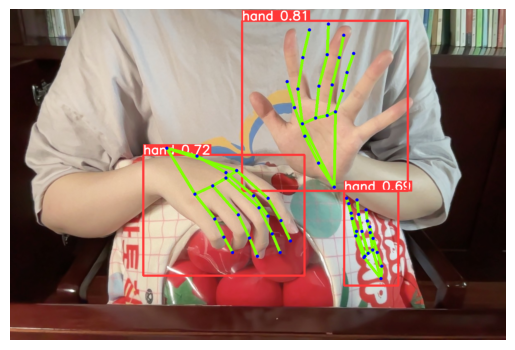

In [12]:
results = model.predict("custom_imgs/custom3.jpg", conf=0.5)

for r in results:
    im_array = r.plot(kpt_radius=0)
    image = np.array(im_array[..., ::-1])
    keypoints = r.keypoints.xy.numpy()

    W = image.shape[0]
    thickness = W // 120
    line_image = plot_line(image, skeleton, keypoints, thickness-1)
    kpt_image = plot_keypoints(line_image, keypoints, thickness+2)
    plt.imshow(kpt_image)
    plt.axis(False)


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/custom_imgs/custom4.jpg: 864x1280 1 hand, 147.7ms
Speed: 7.5ms preprocess, 147.7ms inference, 0.6ms postprocess per image at shape (1, 3, 864, 1280)


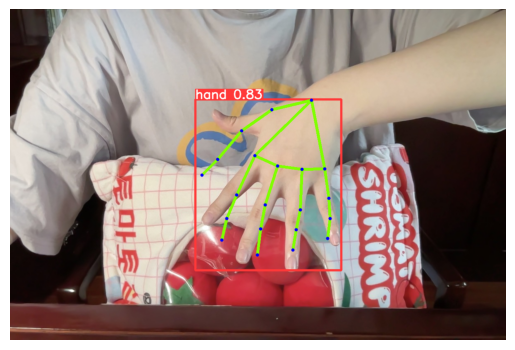

In [13]:
results = model.predict("custom_imgs/custom4.jpg", conf=0.5)

for r in results:
    im_array = r.plot(kpt_radius=0)
    image = np.array(im_array[..., ::-1])
    keypoints = r.keypoints.xy.numpy()

    W = image.shape[0]
    thickness = W // 120
    line_image = plot_line(image, skeleton, keypoints, thickness-1)
    kpt_image = plot_keypoints(line_image, keypoints, thickness+2)
    plt.imshow(kpt_image)
    plt.axis(False)


image 1/1 /Users/wzy/Desktop/GitHub/Hand_Landmark_Detection/custom_imgs/custom5.jpg: 864x1280 3 hands, 146.5ms
Speed: 6.7ms preprocess, 146.5ms inference, 0.6ms postprocess per image at shape (1, 3, 864, 1280)


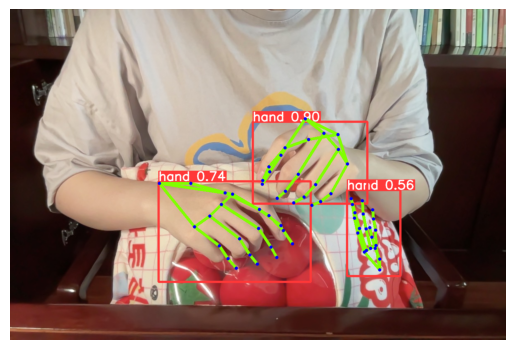

In [14]:
results = model.predict("custom_imgs/custom5.jpg", conf=0.5)

for r in results:
    im_array = r.plot(kpt_radius=0)
    image = np.array(im_array[..., ::-1])
    keypoints = r.keypoints.xy.numpy()

    W = image.shape[0]
    thickness = W // 120
    line_image = plot_line(image, skeleton, keypoints, thickness-1)
    kpt_image = plot_keypoints(line_image, keypoints, thickness+2)
    plt.imshow(kpt_image)
    plt.axis(False)